In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.6em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

# <font color='blue'>Predições de vendas das Lojas ROSSMANN </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos

# <font color='blue'>1. Contexto</font>

- Reunião mensal de resultados.
- CFO pediu uma previsão de vendas das próximas 6 semanas de cada loja.

#  <font color='blue'>2. Desafio</font>

## Problema
- Definir o orçamento para a reforma das lojas

## Causa
- Predição de vendas atual apresenta muitas divergências.
- O processo de predição de vendas é baseada em experiências passadas.
- Todo a previsão de vendas é feita manualmente pelas 1.115 lojas da Rossmann.
- A visualização das vendas é limitada ao computador.

## Solução
- Usar Machine Learning para realizar a previsão de vendas de todas as lojas.
- Visualização das predições de vendas poderão ser feitas pelo smartphone.

# <font color='blue'>3. Desenvolvimento da Solução</font>

## Descrição dos Dados

In [14]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


## Descriptive Statistics

In [39]:
# Central Tendency - mean, median
df_mean   = pd.DataFrame( num_attributes.apply( np.mean ) ).T
df_median = pd.DataFrame( num_attributes.apply (np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
df_std   = pd.DataFrame( num_attributes.apply( np.std ) ).T
df_min   = pd.DataFrame( num_attributes.apply( np.min ) ).T
df_max   = pd.DataFrame( num_attributes.apply( np.max ) ).T
df_range = pd.DataFrame( num_attributes.apply( lambda col: col.max() - col.min() ) ).T
df_skew  = pd.DataFrame( num_attributes.apply( lambda col: col.skew() ) ).T
df_kurt  = pd.DataFrame( num_attributes.apply( lambda col: col.kurt() ) ).T

# concatenate
df_stat = pd.concat([df_min, df_max, df_range, df_mean, df_median, df_std, df_skew, df_kurt]).T
df_stat.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

df_stat

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## Mapa Mental de Hipóteses

<div>
<img src="../img/MindMapHypothesis.png" width="800"/>
</div>

## Hipóteses da análise exploratória

**Hipóteses**

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## Análise Exploratória dos Dados

## Response Variable

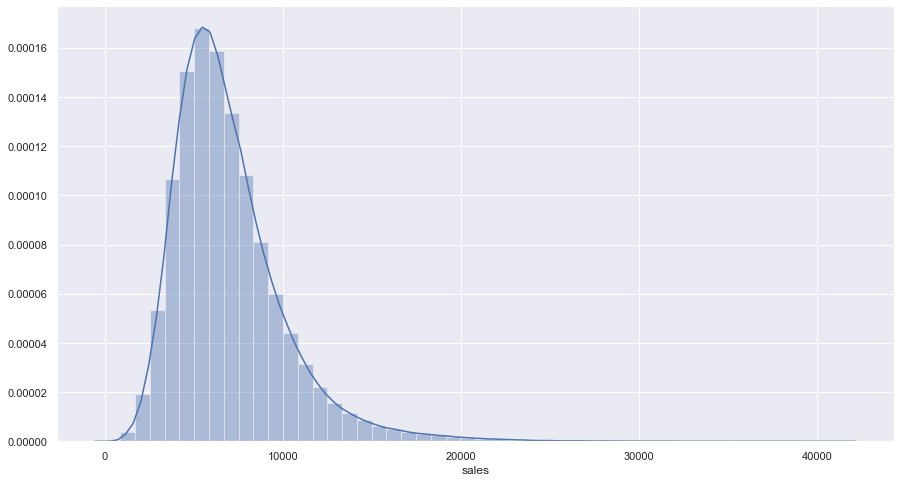

In [67]:
sns.distplot(df4['sales']);

Ao análisarmos a distribuição da variável resposta `sales` percebemos que ela possui um cauda maior à direita, isso indica uma skewness positiva, o que significa que a média é maior que a mediana.

* skew > 0  $\;\; \Rightarrow \;\;$  Mean > Median

Os algoritmos de machine learning são baseados em certas premissas, uma delas é que os dados sejam independentes entre si e que a variável resposta siga uma distribuição normal, quanto mais próximo de uma normal a distribuição da variável resposta for, melhor será performance do modelo.

Nesse caso, apesar de não ser uma distribuição normal perfeita, a curva se assemelha bastante à uma, o que não deve nos causar muitos problemas.

## Numerical Variables

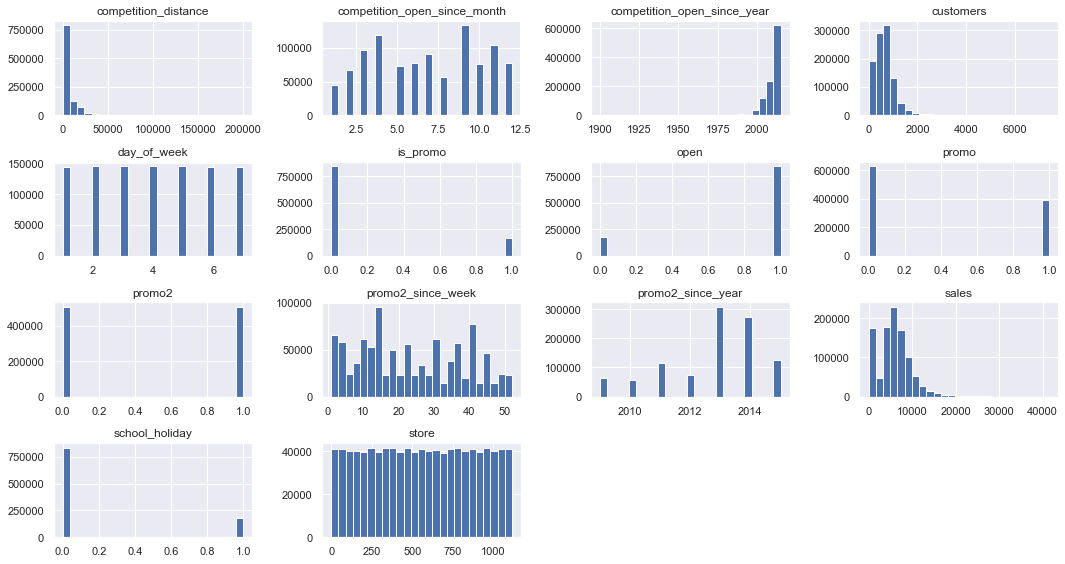

In [68]:
num_attributes.hist(bins=25, layout=(4,4));
plt.tight_layout()

## Categorial Variable

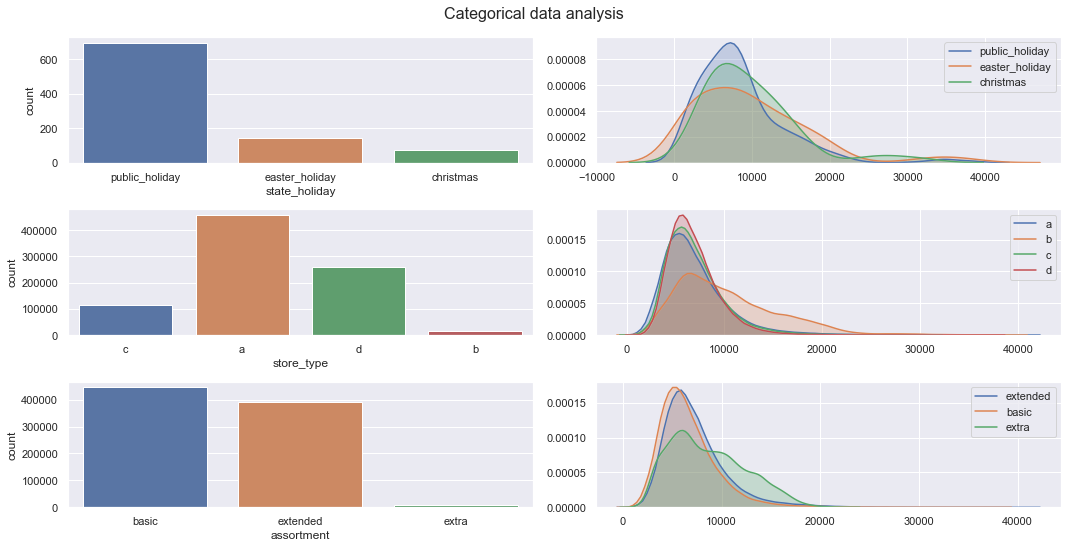

In [74]:
fig, ax = plt.subplots(3, 2)


# state_holiday
sns.countplot(df4.query('state_holiday != "regular_day"')['state_holiday'], ax=ax[0,0])

sns.kdeplot(df4.query('state_holiday == "public_holiday"')['sales'], label='public_holiday', shade=True, ax=ax[0,1])
sns.kdeplot(df4.query('state_holiday == "easter_holiday"')['sales'], label='easter_holiday', shade=True, ax=ax[0,1])
sns.kdeplot(df4.query('state_holiday == "christmas"')['sales'],      label='christmas',      shade=True, ax=ax[0,1])

# store_type
sns.countplot(df4['store_type'], ax=ax[1,0])

sns.kdeplot(df4.query('store_type == "a"')['sales'], label='a', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "b"')['sales'], label='b', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "c"')['sales'], label='c', shade=True, ax=ax[1,1])
sns.kdeplot(df4.query('store_type == "d"')['sales'], label='d', shade=True, ax=ax[1,1])


# assortment
sns.countplot(df4['assortment'], ax=ax[2,0])

sns.kdeplot(df4.query('assortment == "extended"')['sales'], label='extended', shade=True, ax=ax[2,1])
sns.kdeplot(df4.query('assortment == "basic"')['sales'],    label='basic',    shade=True, ax=ax[2,1])
sns.kdeplot(df4.query('assortment == "extra"')['sales'],    label='extra',    shade=True, ax=ax[2,1])

fig.suptitle('Categorical data analysis', fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Validação das Hipóteses

#### H1. Lojas com maior sortimento deveriam vender mais.

**Falsa** Lojas com MAIOR SORTIMENTO vendem MENOS

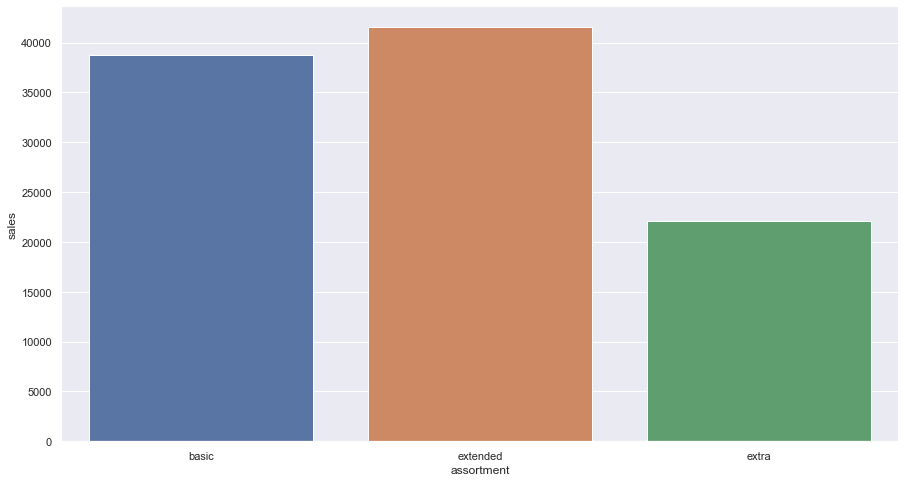

In [82]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').max().reset_index()

sns.barplot(data=aux1, x='assortment', y='sales');

Nesse gráfico conseguimos ver que o volume total de vendas é lojas de `assortment` extra vende menos que as de `assortment` basic e extended.

Assortment do nível maior para o menor:
1. extra
2. extended
3. basic.

Percebemos então que o maior assortment possui o menor nível de vendas o que contraria a nossa hipótese.

Será que houve uma mudança de comportamento ao longo do tempo? Digamos que o assortment extra vendia muito no passado mas conforme o tempo o seu volume de vendas foi diminuindo, por isso o seu volume estaria baixo. Vamos investigar essa hipótese.

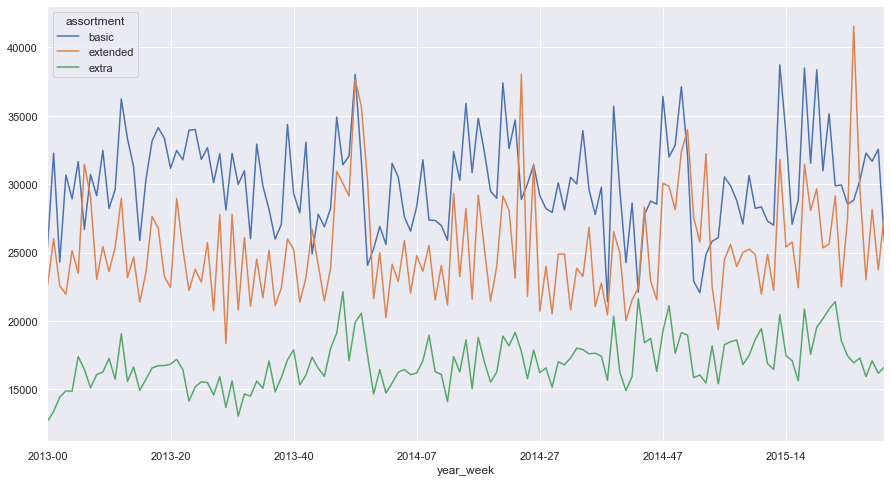

In [83]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).max().reset_index()

aux3 = aux2.pivot(index='year_week', columns='assortment', values='sales')

aux3.plot();

Pelo gráfico podemos notar que o comportamento dos assortments 'basic' e 'extended' são muito semelhantes conforme as semanas foram se passando, isso ajuda a explicar o motivo do volume de vendas ser bem parecidos como foi visto no gráfico de barras. O 'assortment' do extra é bem menor que os outros no gráfico, para entender melhor o seu comportamento, vamos plotar esse assortment separado.

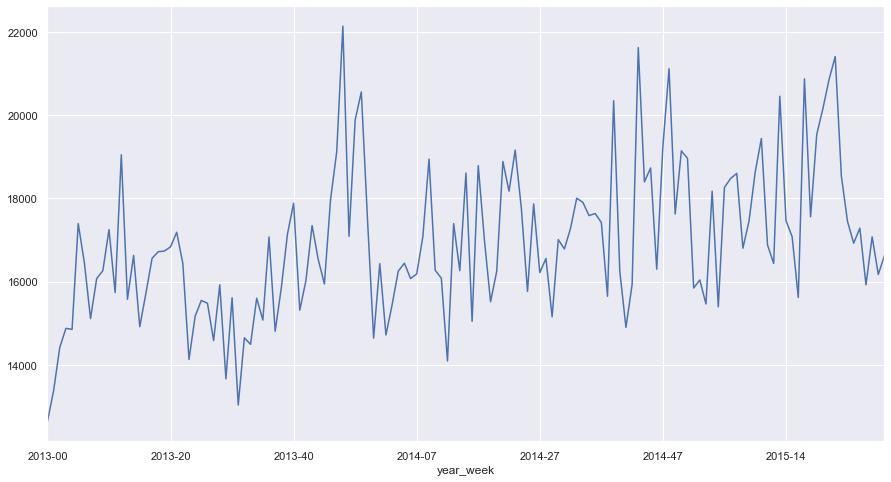

In [84]:
aux3['extra'].plot();

1. Lojas com menor sortimento tem volume de vendas maiores.


2. Os assortments 'basic' e 'extended' se comportarem de maneira igual e o 'extra' possui um comportamento distinto, isso pode trazer uma variabilidade que será útil no treinamento do modelo.

#### H2. Lojas com competidores mais próximos deveriam vender menos.

**Falsa** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

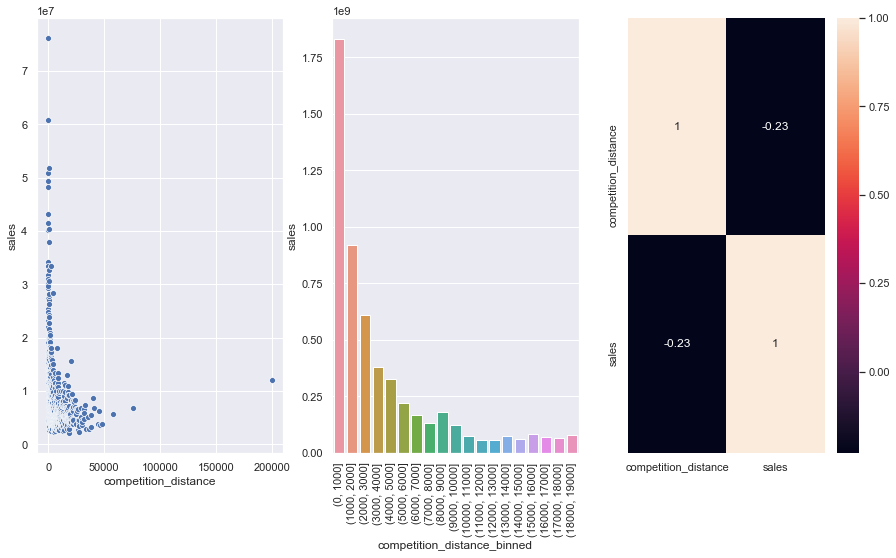

In [92]:
fig, ax = plt.subplots(1, 3)

sns.scatterplot(data=aux1, x='competition_distance',    y='sales', ax=ax[0]);
sns.barplot(data=aux2, x='competition_distance_binned', y='sales', ax=ax[1]).tick_params(axis='x', rotation=90);
sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

A correlação entre as variavéis `competition_distance` e `sales` é de $-0.23$. Quanta mais próximo de zero, menor é a correlação e quanto mais próximo de 1 ou -1 mais forte é a correlação.

* $Corr(x,y) = 0$  - Não há correlação.
* $Corr(x,y) = 1$  - Forte correlação positiva, as variavéis aumentam/diminuem de valor juntas.
* $Corr(x,y) = -1$ - Forte correlação negativa, as variavéis experimentam variações opostas se uma cresce a outra diminui e vice-versa.


Esse valor negativo nos diz que ao aumentarmos `competition_distance` esperamos que o valor de `sales` diminui, ou seja, quando a distância do competidor mais próximo aumenta existe a tendência do número de vendas diminuir.

#### H7. Lojas abertas durante o feriado de Natal deveriam vender mais.

**Falsa** Lojas abertas durante o feriado de natal vendem menos.

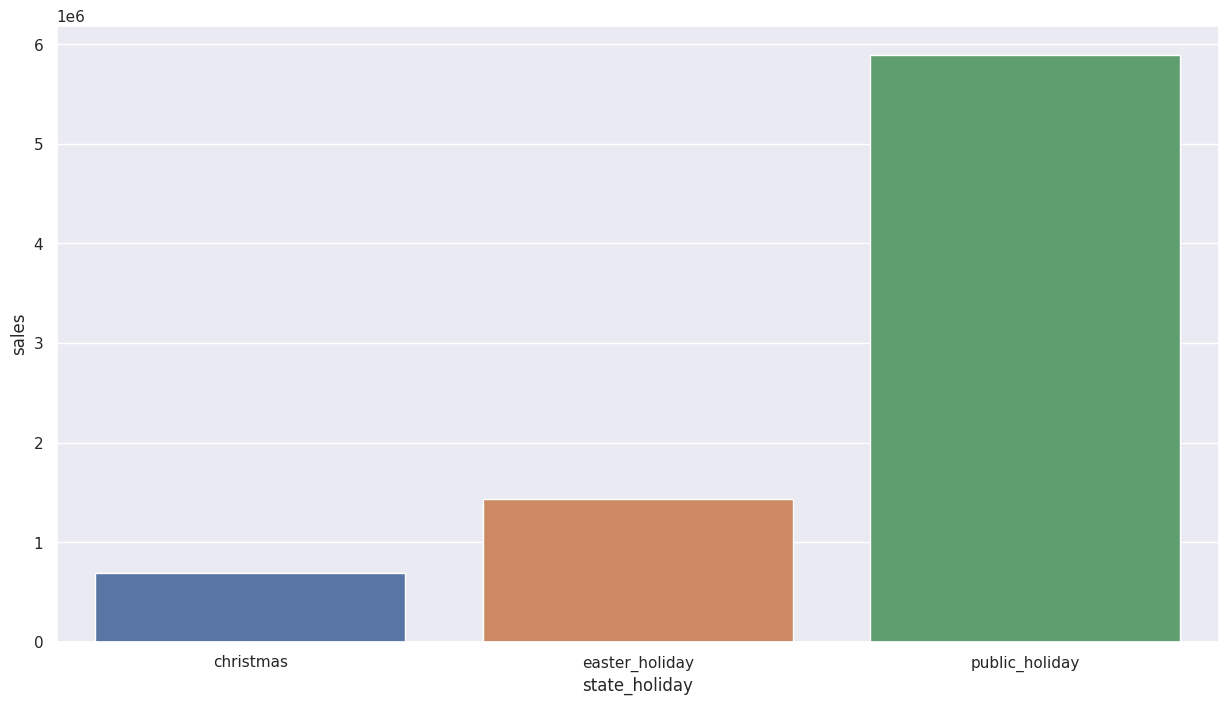

In [ ]:
aux1 = ( df4.query('state_holiday != "regular_day"')[['state_holiday', 'sales']]
        .groupby('state_holiday')
        .sum()
        .reset_index()
       )

sns.barplot(data=aux1, x='state_holiday', y='sales');

Visivelmente no natal o volume de vendas é menor que na páscoa e feríados públicos.

Vamos verificar se isso sempre aconteceu ou se houve uma mudança de têndencia ao longo do tempo.

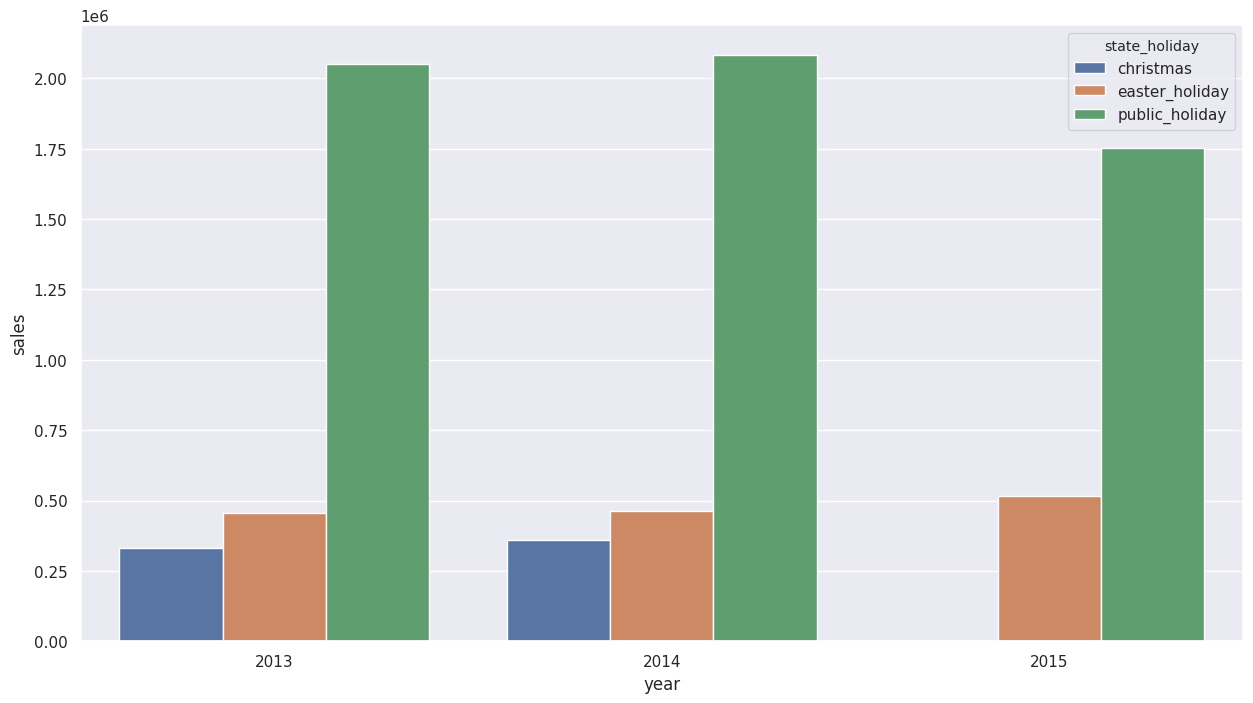

In [ ]:
aux2 = ( df4.query('state_holiday != "regular_day"')[['year', 'state_holiday', 'sales']]
        .groupby(['year', 'state_holiday'])
        .sum()
        .reset_index()
       )

sns.barplot(data=aux2, x='year', y='sales', hue='state_holiday');

As vendas de Natal foram menores nos anos de 2013 e 2014. No ano de 2015 não temos dados, pois a data mais recente do dataframe é de antes do natal.

#### H10. Lojas deveriam vender mais depois do dia 10 de cada mês.

**Verdadeira** Lojas vendem mais depois do dia 10 de cada mês.

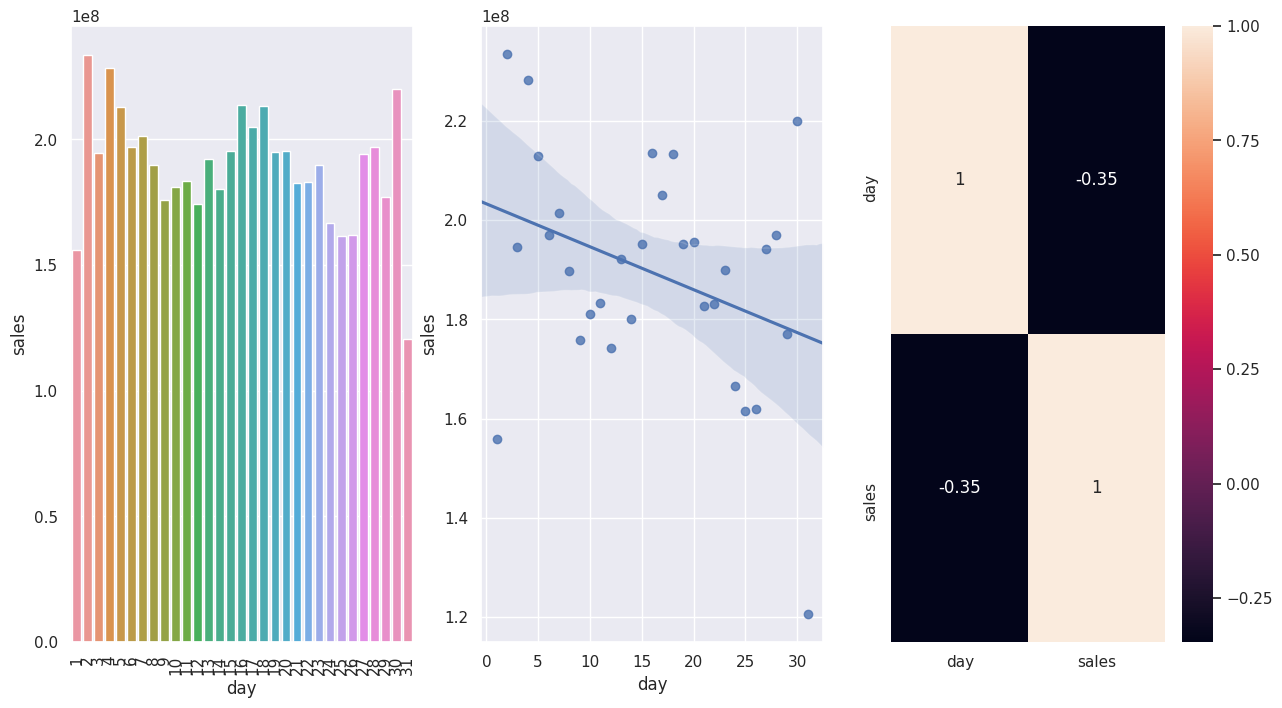

In [ ]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux1, x='day', y='sales', ax=ax[0]).tick_params(axis='x', rotation=90);

sns.regplot(data=aux1, x='day', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

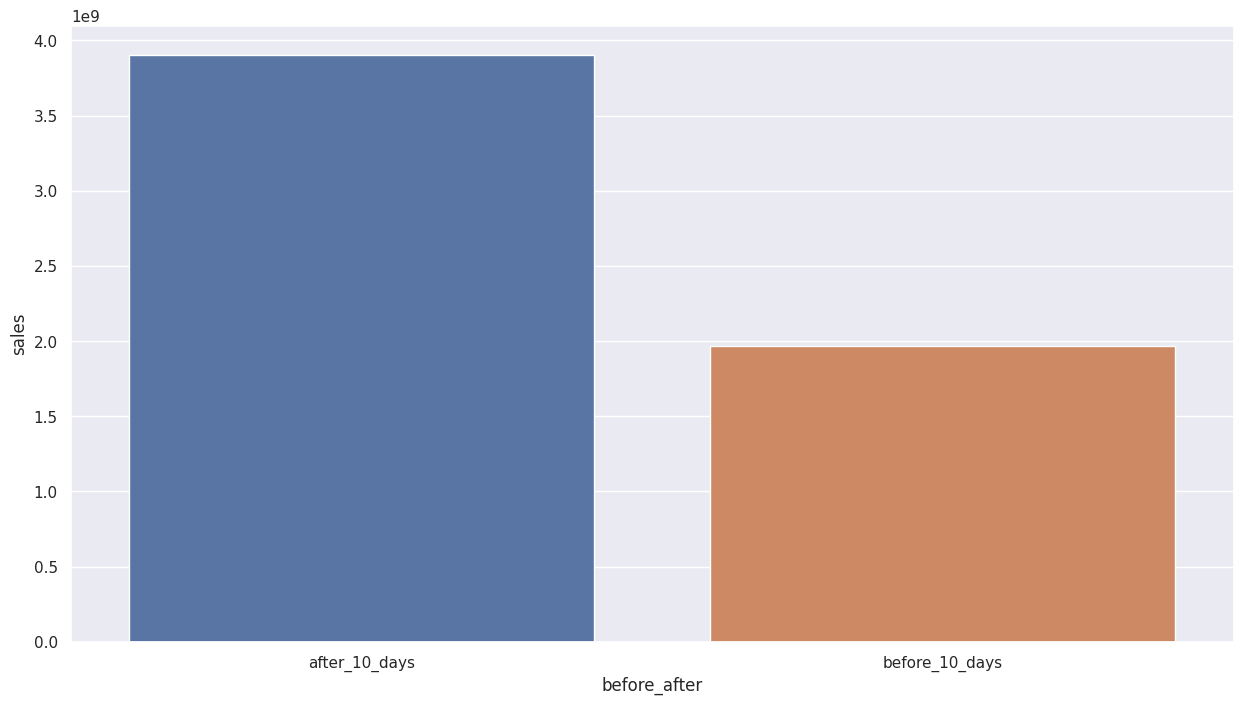

In [ ]:
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')

aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

sns.barplot(data=aux2, x='before_after', y='sales');

#### H11. Lojas deveriam vender menos aos finais de semana.

**Verdadeira** Lojas vendem menos no final de semana

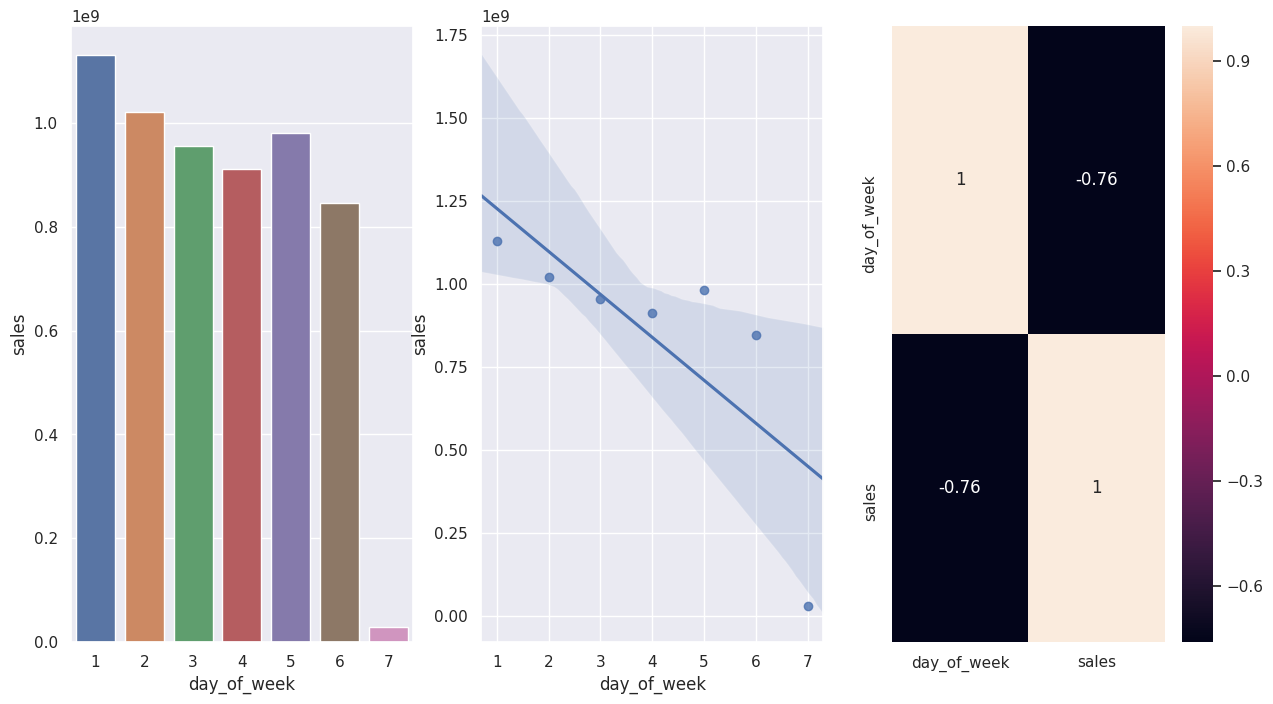

In [ ]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()


fig, ax = plt.subplots(1, 3)

sns.barplot(data=aux1, x='day_of_week', y='sales', ax=ax[0]);

sns.regplot(data=aux1, x='day_of_week', y='sales', ax=ax[1]);

sns.heatmap( aux1.corr(method='pearson'), annot=True, ax=ax[2] );

#### H12. Lojas deveriam vender menos durante os feriados escolares.

**Verdadeiro** Lojas vendem menos durante os feriados escolares (exceto nos meses de Julho e Agosto)

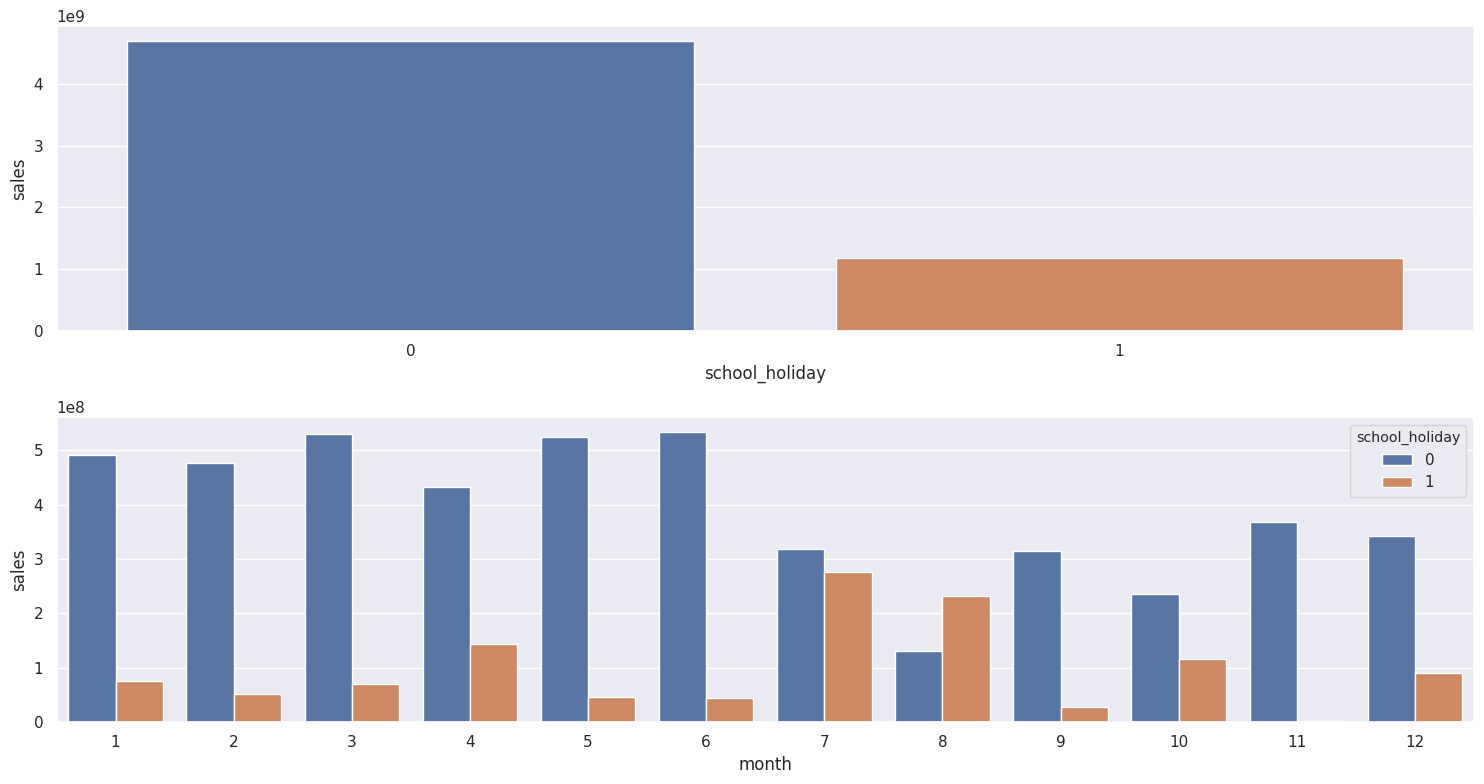

In [ ]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()


fig, ax = plt.subplots(2, 1)

sns.barplot(data=aux1, x='school_holiday', y='sales', ax=ax[0]);

sns.barplot(data=aux2, x='month', y='sales', hue='school_holiday', ax=ax[1]);

fig.tight_layout()

## Resumo da Hipoteses

In [ ]:
tab = [['Hipoteses', 'Conclusao', 'Relevancia'],
       ['H1', 'Falsa', 'Baixa'],
       ['H2', 'Falsa', 'Media'],
       ['H3', 'Falsa', 'Media'],
       ['H4', 'Falsa', 'Baixa'],
       ['H5', '-',      '-'],
       ['H6', 'Falsa', 'Baixa'],
       ['H7', 'Falsa', 'Media'],
       ['H8', 'Falsa', 'Alta'],
       ['H9', 'Falsa', 'Alta'],
       ['H10', 'Verdadeira', 'Alta'],
       ['H11', 'Verdadeira', 'Alta'],
       ['H12', 'Verdadeira', 'Baixa'],
      ]

print(tabulate(tab, headers='firstrow'))

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


## Análise Multivariada

Pearson é um método estatístico para calcular a correlação entre duas variáveis númericas. Quando temos duas variáveis categóricas ou uma númerica e outra categorica não podemos usar o método de Pearson. Nessa situação, utilizamos o método Cramer-V.

## Numerical Attributes

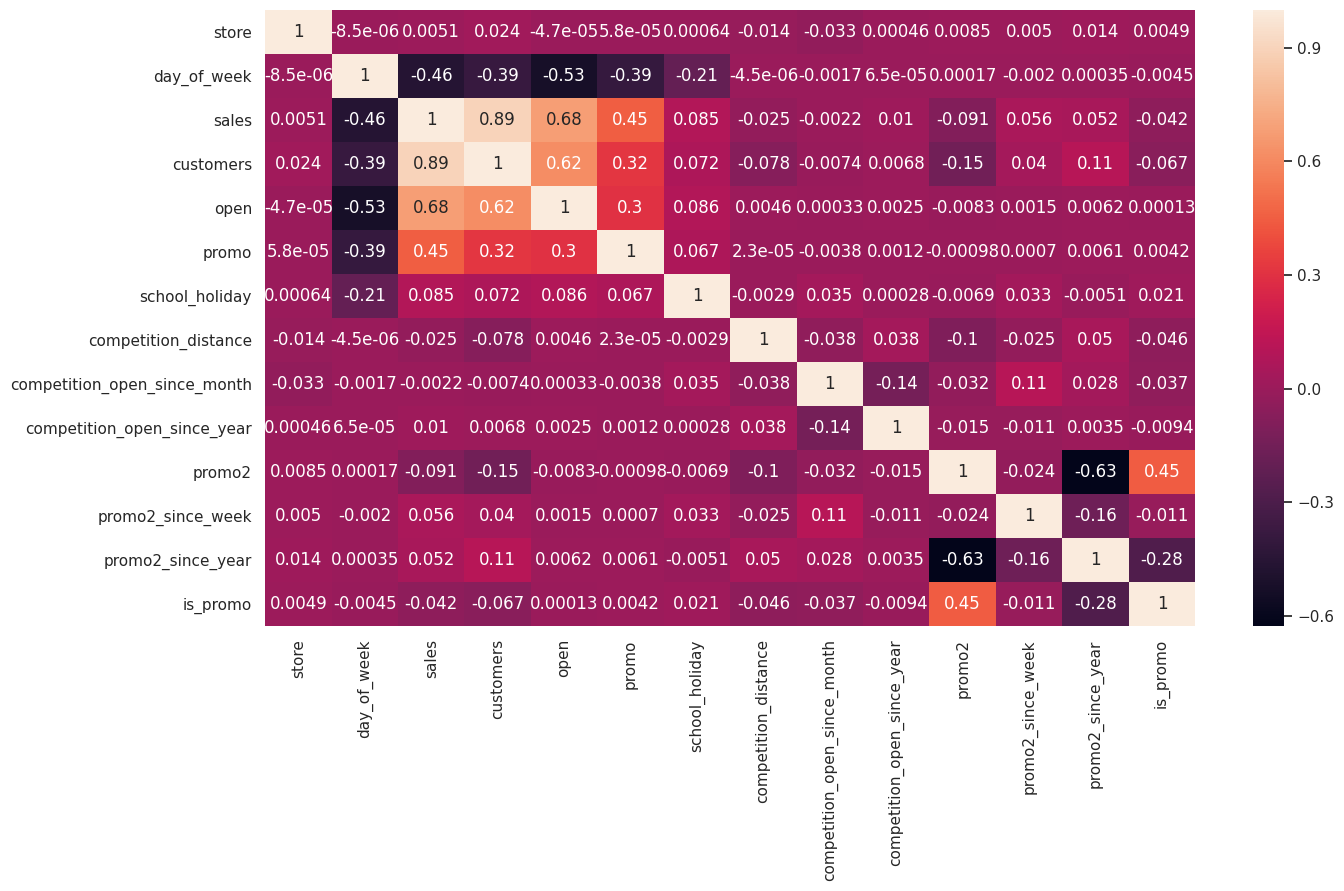

In [ ]:
correlation = num_attributes.corr(method='pearson')

sns.heatmap(correlation, annot=True);

## Categorial Attributes

O método de Cramer-V é calculado através da seguinte fórmula:

${\displaystyle V={\sqrt {\frac {\varphi ^{2}}{\min(k-1,r-1)}}}={\sqrt {\frac {\frac{\chi^{2}}{n}}{\min(k-1,r-1)}}}\;,}$

Onde:

* $\varphi$ is the phi coefficient.
* $\chi ^{2}$ is derived from Pearson's chi-squared test
* $n$ is the grand total of observations
* $k$ being the number of columns.
* $r$ being the number of rows.

O valor do V de Cramer varia no intervalo de 0 a 1. Portanto em variáveis categóricas não existe correlação negativa, ou temos correlação ($V \approx 1$) ou não temos correlação ($V \approx 0$).

Para calcularmos o valor da correlação de cramer para todos os pares de variáveis categoricas vamos criar uma função. Mas antes de definirmos tal função devemos nos atentar ao fato de que o V de Cramer pode ser uma estimador altamente enviesado e tenderá a superestimar a força da correlação.

Para corrigir possíveis efeito devemos utilizar um corretor de viés:

${\displaystyle {\tilde {V}}={\sqrt {\frac {{\tilde {\varphi }}^{2}}{\min({\tilde {k}}-1,{\tilde {r}}-1)}}}}$

Onde:

* ${\displaystyle {\tilde {\varphi }}^{2}=\max \left(0,\varphi ^{2}-{\frac {(k-1)(r-1)}{n-1}}\right)}$


* ${\displaystyle {\tilde {k}}=k-{\frac {(k-1)^{2}}{n-1}}}$


* ${\displaystyle {\tilde {r}}=r-{\frac {(r-1)^{2}}{n-1}}}$

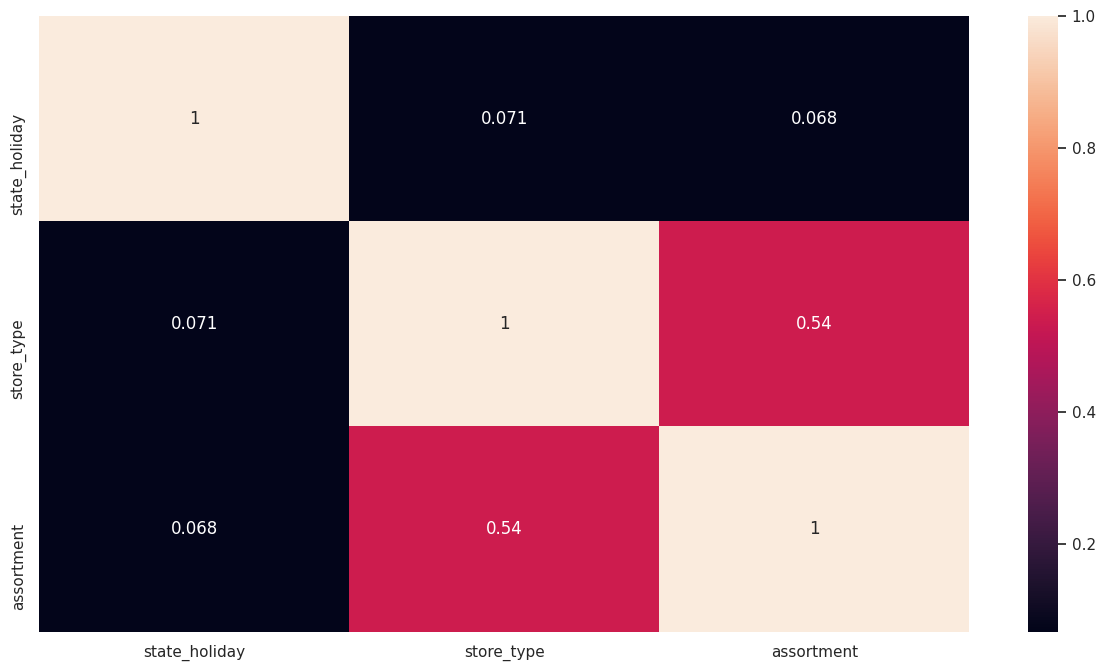

In [ ]:
sns.heatmap(cramer_correlation, annot=True);

## Machine Learning Modelling

## Compare Model's Performance

In [ ]:
modelling_result_cv = pd.concat( [ lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv ] )

modelling_result_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,829.2 +/- 206.56,0.11 +/- 0.02,1262.58 +/- 337.84
0,XGBoost Regressor,1025.82 +/- 159.78,0.14 +/- 0.01,1491.11 +/- 252.3
0,Linear Regression,2071.47 +/- 295.26,0.29 +/- 0.02,2962.55 +/- 453.13
0,Lasso,2127.05 +/- 339.24,0.29 +/- 0.01,3071.79 +/- 499.93


Observando a tabela acima percebemos que a Random Forest Regressor possui a melhor performance real, enquanto o segundo lugar ficou com XGBoost Regressor. 

Podemos notar que a diferença entre os erros da Random Forest e do XGBoost ficou relativamente pequena, em torno de 200 no MAE e RMSE, já em relação ao modelos lineares a diferença de performance é bastante acentuada e não pode ser desprezada.

Apesar da performance superior da Random Forest optaremos pela XGBoost, por 2 motivos principais:


- Ganho de traquejo com uma ferramenta menos conhecida, mas que vem se tornando cada vez mais popular.

- Modelo treinado da XGBoost costuma ser muito mais leve que a Random Forest. Isso faz que em alguns cenários, seja mais vantajoso usar a XGBoost pela diminuição de custos com recursos computacionais, mesmo que a performance do modelo seja inferior.

# <font color='blue'>4. Conclusão & Demonstração</font>

## Tradução e Interpretação do Erro

## Business Performance

In [ ]:
df92.sample(5)

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
977,978,265065.781250,264473.026908,265658.535592,592.754342,0.084356
954,955,188045.500000,187680.153004,188410.846996,365.346996,0.076185
1017,1018,410203.250000,409311.316037,411095.183963,891.933963,0.080142
436,437,258398.859375,257360.534971,259437.183779,1038.324404,0.144495
393,394,316123.843750,315564.904152,316682.783348,558.939598,0.064684


Na tabela acima está listado o pior e o melhor cenário para cada loja. Esses valores foram calculados subtraindo e somando o valor do **MAE** ao valor predito, ou seja, essas duas colunas criam um intervalo na qual esperamos que o faturamento da loja nas próximas esteja.

Uma maneira do CEO da empresa criar a estratégia de negócio e estimar com mais cautela qual será o faturamento total esperado, seria utilizar o valor do **MAPE** para decidir qual cenário é mais provável e se ele pode se basear no resultado do modelo em determinadas lojas. Por exemplo, se $\text{MAPE} \le 10\%$, o CEO poderia considerar que o modelo confiável nesse loja, mas para valores altos $\text{MAPE} > 10\%$, o modelo não conseguiu prever com uma certeza suficiente.

In [ ]:
df92.sort_values('MAPE', ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,105808.343750,102472.317871,109144.369629,3336.025879,0.572043
908,909,235225.437500,227618.781760,242832.093240,7606.655740,0.515822
721,722,362131.968750,359893.158652,364370.778848,2238.810098,0.298843
875,876,203248.328125,199373.830174,207122.826076,3874.497951,0.289901
273,274,196241.812500,194844.241518,197639.383482,1397.570982,0.244769


Temos duas lojas com $\text{MAPE} > 50\%$, isso implica que o valor predito pode ser $50\%$ maior ou menor que o valor real. Claramente não se deve confiar no modelo quando o time de negócios for criar suas estratégias para essas lojas.

Poderíamos, criar um modelo diferente para algumas lojas em específico no próximo ciclo do CRISP-DS, digamos, todos as lojas com $\text{MAPE} > 20\%$. Nessa situação teríamos dois modelos diferentes, talvez as features atuais não consigam captar um comportamento específico que tais lojas possuem.

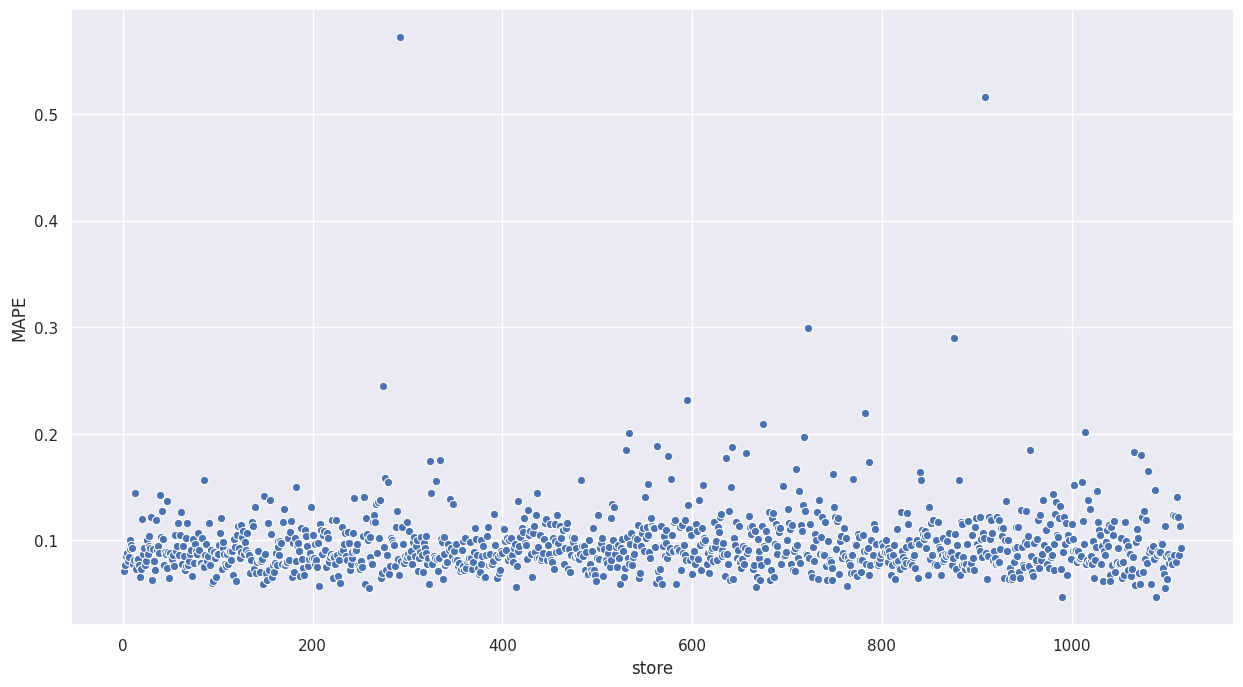

In [ ]:
sns.scatterplot( data=df92, x='store', y='MAPE' );

## Total Performance

In [ ]:
df93 = ( df92[['predictions', 'worst_scenario', 'best_scenario']]
                .apply( lambda x: np.sum(x), axis=0 )
                .reset_index()
                .rename( columns={'index': 'Scenarios', 0: 'Values'} ) 
       )

df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )

df93

,Scenarios,Values
0,predictions,"R$287,018,496.00"
1,worst_scenario,"R$286,292,639.01"
2,best_scenario,"R$287,744,371.10"


## Machine Learning Performance

<Axes: xlabel='predictions', ylabel='error'>

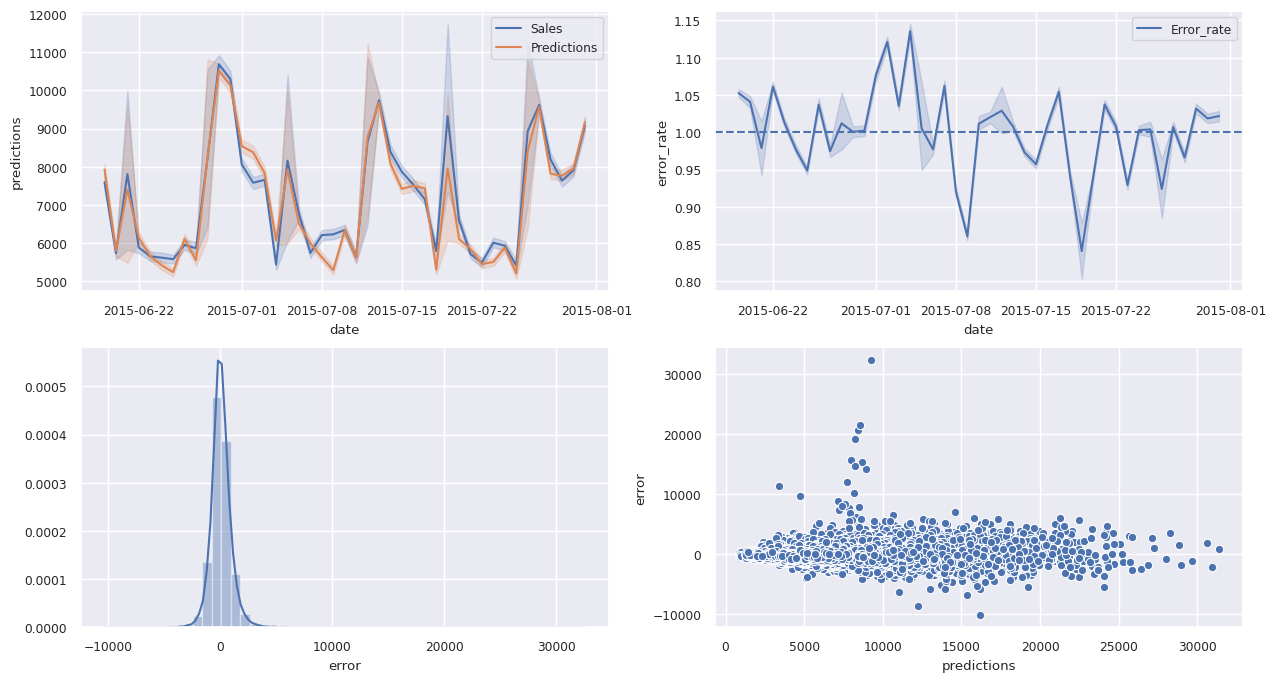

In [ ]:
sns.set( font_scale=0.8 )

fig, axes = plt.subplots(2, 2)

# first graph
sns.lineplot( data=df9, x='date', y='sales',       label='Sales',       ax=axes[0, 0] )
sns.lineplot( data=df9, x='date', y='predictions', label='Predictions', ax=axes[0, 0] )

# second graph
sns.lineplot( data=df9, x='date', y='error_rate',  label='Error_rate',  ax=axes[0, 1] )
axes[0, 1].axhline( 1, linestyle='--' )

# third graph
sns.distplot( df9['error'], ax=axes[1, 0] )

# fourth graph
sns.scatterplot( data=df9, x='predictions', y='error', ax=axes[1, 1] )

# <font color='blue'>5. Próximos Passos</font>

- Workshop do modelo para os business users.
- Coletar feedbacks sobre a usabilidade.
- Aumentar em 10% a acurácia do modelo.

# <font color='blue'>Q & A</font>

# <font color='blue'>Muito Obrigado</font>